

# Centrality and Importance

In many connected systems, we might want to develop some measure of the *relative importance* of different nodes. Maybe we have reason to believe that some node is especially structurally important: a super spreader in a disease model; a key influence broker in a social network; a critical hub in a transportation network.

So, how do we find important nodes? The answer, naturally, depends on *how* we define importance! Historically, the idea of importance in networks has often been expressed in terms of *centrality*: nodes that are *central* to the network are the ones which are considered to be important. We'll follow tradition in using the term "centrality," although we should keep in mind that the idea of "centrality" is a bit metaphorical and that we're not really talking about nodes being in the "middle" of anything.

As our general setup, we'll consider a centrality measure to be a function $f$ which assigns to each node $i$ in a graph $G$ a score $c_i$. We'll collect these scores into a vector $\mathbf{c}$, and so we can think about a centrality measure as a computation $\mathbf{c} = f(G)$. We'll call this vector $\mathbf{c}$ the *centrality vector*. Our discussion below will show several different ways to define the function $f$, which will in turn influence how we interpret the vector $\mathbf{c}$. [Typically, we won't worry too much about the *exact* values of the vector $\mathbf{c}$; often we're just interested in the relative ordering.]{.aside}

Depending on the application, having good answers to the question of importance could help determine how to target interventions, predict how diseases or information might spread, or create rankings and search algorithms. @boldi2014axioms provide a good historical account of centrality measures, as well as a useful mathematical exploration of their properties.

## Degree Centrality

One natural definition of importance would be to suppose that important nodes have lots of connections to other nodes. Conveniently, we already have a way to measure this quantity: this is the degree!

Suppose that we have an undirected graph on $n$ nodes. We can define the degree vector $\mathbf{k} = (k_1, k_2, \ldots, k_n)$, where $k_i$ is the degree of node $i$. We can then simply set the *degree centrality* vector $\mathbf{c}_{\text{deg}}$ as the degree vector: $\mathbf{c}_{\text{deg}} = \mathbf{k}$.

Since we're really just talking about the degree vector, we end up with a simple matrix-vector calculation of $\mathbf{c}_{\text{deg}}$:

$$
\begin{align}
    {\bf c}_{\mathrm{deg}} = {\bf A}{\bf 1}
\end{align}
$${#eq-degree-centrality}

where ${\bf 1}$ is the vector containing all ones.

::: {.callout-important icon=false appearance="minimal"}

## Exercise

Let $\mathbf{D}$ be the diagonal matrix of degrees. Prove that, provided that every node has degree at least 1, @eq-degree-centrality is equivalent to the statement that $\mathbf{c}_{\mathrm{deg}}$ is an eigenvector of the matrix $\mathbf{A} \mathbf{D}^{-1}$ with eigenvalue $1$.

:::



Let's visualize degree centrality in the Zachary karate club network. In the hidden code cell below, we import some libraries, acquire the data, and define a useful plotting function that will make it easy to visualize different centrality measures on this network.

In [1]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

def unweight(G):
    for source, target in G.edges():
        G[source][target]['weight'] = 1
    return G

G = unweight(nx.karate_club_graph())

plot_kwargs = {
    "with_labels": True,
    "node_size": 400,
    "font_size": 8,
    "edge_color": "gray",
    "edgecolors": "white",
    "cmap" : "Blues",
    "width" : 0.3

}

pos = nx.kamada_kawai_layout(G)

def plot_centrality(G, pos, c):
    fig, ax = plt.subplots(1, 1, figsize = (6, 4))
    font_color = {i : ["black", "white"][int(c[i] > 0.8*c.max())] for i in range(len(c))}
    nx.draw(G, pos, **plot_kwargs, node_color = c, font_color = font_color)

Now we'll compute the degree centrality (using the `nx.degree_centrality` builtin) and visualize it on the network.

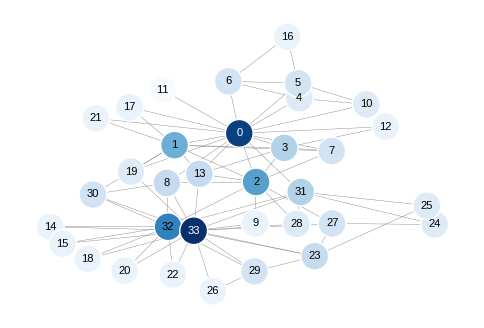

In [6]:

## Degree
deg = nx.degree_centrality(G)
deg = np.array([deg[i] for i in deg.keys()])
plot_centrality(G, pos, deg)

The most central (highest degree) nodes are nodes 0 and 33. In this history of this club, node 0 was the chief instructor (pseudonym: "Mr. Hi"), while node 33 was the president of the club. These two nodes eventually led the factions that split into separate karate clubs.

It is also possible to define degree centrality for directed networks. We can use either in- or out-degree as centrality measures, depending on what is useful for the context or application.

### Advantages and Disadvantages

Degree centrality is quick to calculate and interpret, which makes it an attractive choice of centrality measure. The link between network structure and centrality is very clear.


However, there's an important idea which isn't really captured by degree centrality. What if you have a *lot* of connections, but the nodes you're connected to aren't themselves very important? Conversely, what if you have very few connections, but the connections you have are to especially important nodes? [For example, if I have two friends, you may view me as more important if my two friends are Beyonc\'{e} and Taylor Swift than if they were two people you had never heard of. ]{.aside}

## Eigenvector Centrality

**Eigenvector centrality** is our first expression of the idea that the importance of a node is related not only to the *number* of neighbors of that node, but also the importance of those neighbors. The idea is to weight each connection for a node by the centrality of the adjacent neighbor. In this way, high centrality is achieved either by having lots of connections, or by having a few important connections.

Suppose we have an undirected network with $n$ nodes. We calculate the centrality $c_i$ of node $i$ by summing the centralities of its neighbors. We'll incorporate a constant of proportionality $\frac{1}{r}$ for some $r > 0$; we'll see why this is necessary in a moment.  This gives the equation

$$
\begin{align}
    c_i &= \frac{1}{r}\sum_{j \in \text{neighbors of } i} c_j \, \\
    &= \frac{1}{r} \sum_{j=1}^n A_{ij}c_j \,.
\end{align}
$$ {#eq-eigenvector}

Let ${\bf c}_{\mathrm{eig}}$ be our new centrality vector. We can recognize the righthand side as $\frac{1}{r} \mathbf{A} \mathbf{c}_{\mathrm{eig}}$, so our equation describing $\mathbf{c}_{\mathrm{eig}}$ is

$$
\begin{align}
    {\bf c}_{\mathrm{eig}} = \frac{1}{r}{\bf A}{\bf c}_{\mathrm{eig}} \implies r{\bf c}_{\mathrm{eig}} = {\bf A}{\bf c}_{\mathrm{eig}} \,.
\end{align}
$$

Now the name of this centrality measure is very clear: ${\bf c}_{\mathrm{eig}}$ is an eigenvector of ${\bf A}$ with associated eigenvalue $r$!


This leads us to a challenge: which eigenvector should we choose? We have up to $n$ linearly independent eigenvectors to choose from, as well as linear combinations of these, so our task of making a meaningful choice seems quite daunting. One reasonable requirement is that we'd like our centrality scores to be nonnegative. Will we always be able to find such an eigenvector for any graph?

Fortunately, we have a powerful theorem that can help us with this task.

<!-- ### Perron--Frobenius -->

::: {.callout-tip icon=false collapse=true}
::: {#thm-perron-frobenius}

## Perron--Frobenius

Let $\mathbf{M} \in \mathbb{R}^{n\times n}$ be a matrix with nonnegative entries. Then:

1. $\mathbf{M}$ has a nonnegative eigenvector with corresponding positive eigenvalue.
2. If $\mathbf{M}$ is an adjacency matrix for a (strongly) connected network, then the eigenvector is unique and strictly positive, and the corresponding eigenvalue is the largest eigenvalue of $\mathbf{M}$.


:::
:::

We won't reproduce the entire proof here. @horn2012matrix provides a comprehensive discussion of the proof of this theorem. @keener1993perron also provides a concise proof and interesting applications to ranking.

From the Perron--Frobenius theorem, we know we are guaranteed to have at least one nonnegative eigenvector for $\mathbf{A}$. This is good news! For the case where we have a strongly connected graph, then we have a nice *unique* answer to our problem. We should choose an eigenvector associated with the largest eigenvalue (i.e., the *leading eigenvalue*). Notice that an scalar multiple of this eigenvector will also work, as the relative rankings of nodes is still preserved. Many people will choose to use a normalized eigenvector for convenience.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-eigenvector-centrality}

## Eigenvector Centrality

For a connected undirected graph (or strongly connected directed graph), the **eigenvector centrality vector** ${\bf c}_{\mathrm{eig}}$ is the eigenvector corresponding to the unique largest eigenvalue of $\mathbf{A}$. This means that ${\bf c}_{\mathrm{eig}}$ and $r$ satisfy the equation

$$
    r{\bf c}_{eig} = {\bf A}{\bf c}_{eig} \,
$$

where $r$ is the leading eigenvalue of $A$.
:::
:::

When multiple connected components exist in an undirected graph (or multiple strongly connected components in a directed graph), the second statement of @thm-perron-frobenius does not apply. However, we can still calculate the eigenvector centrality of each component separately, as each strongly connected component satisfies all conditions for the theorem.


Let's compute the eigenvector centrality of the Zachary karate club network and visualize it. [We could also have done this using the `nx.eigenvector_centrality()` built-in function.]{.aside}

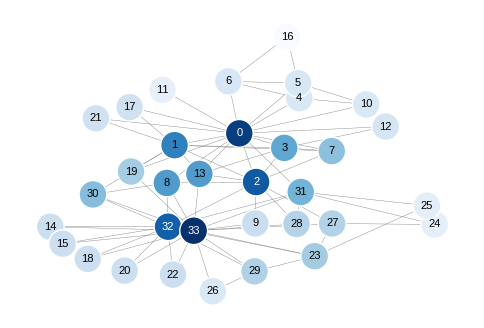

In [13]:

## Eigenvector centrality
A = nx.to_numpy_array(G)
eigvals, eigvecs = np.linalg.eigh(A)
eig_centrality = np.abs(eigvecs[:, np.argmax(eigvals)]) # index of largest eigenvalue, each eigvec is columnwise
# eigenvecs defined up to scalar multiples

plot_centrality(G, pos, eig_centrality)

Compared to the degree centrality, nodes like 2 and 13 have higher relative centralities in the network; they don't themselves have many connections, but they connections they *do* have are to important nodes like 0 and 33.

### Complications with Directed Networks

Unfortunately, applying eigenvector centrality in the case of directed networks can lead to issues.

- Should we focus on in-edges or out-edges? This depends on the context! In-edges correspond to right eigenvectors of $\mathbf{A}$ and and out-edges correspond to left eigenvectors of $\mathbf{A}$. In an  undirected network, $\mathbf{A}$ is symmetric and so the left and right eigenvectors are the same; when the network is directed, these eigenvectors are different and we therefore have to choose.
- Only nodes that are in a strongly connected component of two or more nodes, or in the out-component of such a strongly connected component, have nonzero eigenvector centrality.

We see this second issue in the network below.

In [ ]:

fig, ax = plt.subplots(1, 1, figsize = (6, 4))
DG = nx.DiGraph()
DG.add_edges_from([(1,2), (1, 4), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5)])

nx.draw(DG, with_labels = True, arrowsize = 20, font_color = 'white', font_weight = 'bold', node_color = "steelblue", edgecolors = "white", width = 0.5, edge_color = "grey", node_size = 1000, ax = ax)

::: {.callout-note icon=false appearance="minimal"}

## Exercise

The in-eigenvector-centrality of a directed network is defined by the formula

$$
\begin{aligned}
    c_i &= \frac{1}{r} \sum_{j \in \text{in-neighbors of } i} c_j \, \\
    &= \frac{1}{r} \sum_{j=1}^n A_{ji}c_j \,.
\end{aligned}
$$ {#eq-in-eigenvector}

This is just like @eq-eigenvector, but we specify that we are summing over all the in-neighbors of $i$.

Calculate the in-degree eigenvector centrality  of each node in @fig-strong-component-exercise, using the component-wise formula @eq-in-eigenvector.
:::






## Katz Centrality

It would be nice to be able to generalize eigenvector centrality while being able to avoid some of the issues that arose with nodes having zero centrality if they have zero in-degree.

We could try to introduce an intuitive fix by giving each node some centrality "for free." That is, let's try the formula

$$
\begin{align}
    c_i = \alpha \sum_j A_{ij}c_j + \beta \,
\end{align}
$$

where $\alpha, \beta > 0$ are constants. The first term follows the form we derived for eigenvector centrality, and the second is the baseline level of centrality that all nodes get, regardless of their connections.

Writing in matrix-vector form, we arrive at a centrality measure ${\bf c}_{\mathrm{Katz}}$ due to @katz1953new:

$$
\begin{align}
    {\bf c}_{\mathrm{Katz}} = \alpha A {\bf c}_{\mathrm{Katz}} + \beta {\bf 1} \,.
\end{align}
$$

If $I-\alpha A$ is invertible, then we will be able to write a nice expression for ${\bf c}_{\mathrm{Katz}}$.
We know this matrix is not invertible when $\det(I-\alpha A) = 0$, which is equivalent to the scalar multiple $\det(\frac{1}{\alpha}I - A) = 0$. We deduce that this occurs when $\lambda = \frac{1}{\alpha}$, where $\lambda$ are the eigenvalues of the adjacency matrix.

Thus, if we want to be safe and guarantee convergence of our centrality measure, then we should choose $\alpha < \frac{1}{\lambda_1}$, where $\lambda_1$ is the largest (most positive) eigenvalue of $A$.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-katz}

## Katz Centrality

Let ${\bf A}$ be the $n \times n$ adjacency matrix, ${\bf 1}$ be the $n \times 1$ vector containing all ones, and $\beta > 0$ constant. The **Katz centrality** vector ${\bf c}_{\mathrm{Katz}}$ is
$$
    {\bf c}_{\mathrm{Katz}} = \beta \left({\bf I}-\alpha {\bf A}\right)^{-1} {\bf 1} \,.
$$

This centrality is guaranteed to exist provided that the matrix ${\bf I}-\alpha {\bf A}$ is invertible. This is guaranteed provided that we choose $\alpha$ such that $0 < \alpha < \frac{1}{\lambda_1}$, where $\lambda_1$ is the leading eigenvalue of ${\bf A}.$

:::
:::

Often, we will choose to set $\beta = 1$ as a convenient normalization.

Within the constraint $0 < \alpha < \frac{1}{\lambda_1}$, $\alpha$ acts like a tunable parameter: As $\alpha \to 0$, all the nodes have the same centrality. As $\alpha \to \frac{1}{\lambda_1}$ and $\beta \rightarrow 0$, we recover eigenvector centrality.

Let's go ahead and do an example calculation of Katz centrality for the Zachary karate club network.

Now let's implement Katz centrality in NetworkX. Calculate an appropriate range for $\alpha$, and then explore how varying $\alpha$ changes the centrality scores. [Rather than doing the linear algebra by hand, we could also use `nx.katz_centrality()`.]{.aside}

In [ ]:

## Katz centrality


Our results look pretty similar to the eigenvector centrality, but with a bit more uniformity in the centrality scores due to choosing $\alpha$ in the middle of the valid range.


### Advantages and Disadvantages

Katz centrality keeps several of the nice features of eigenvector centrality while avoiding the zero-centrality pitfalls in directed networks. It's also relatively quick to calculate.

However, if a node with high Katz centrality points to many other nodes in a directed network, then those nodes will all "inherit" this high centrality as well. This may be intended behavior in some cases, but in other contexts it might seem strange to allow a single node to contribute lots of centrality to a large number of its neighbors.

## PageRank

Neither eigenvector nor Katz centrality measures penalize high-centrality nodes with a large number of edges. Suppose we wanted to think more of centrality like currency: each node has an allotted amount that it may divide among its edges, so that if you were sharing with more edges, you would have to give a smaller amount to each. This idea would essentially "dilute" centrality based on the number of out-edges. This might be relevant in the example of webpages: Just because a page is linked from a very popular site (say, Wikipedia) does not mean that linked page is itself important. Wikipedia links to many, many, many pages!  

We can implement this idea with a small modification to Katz centrality, where we divide by out-degree of each node.

$$
    c_i = \alpha \sum_j A_{ij} \frac{c_j}{k_{j}^{\mathrm{out}}} + \beta
$$

where we define $k_j^{\mathrm{out}} = 1$ for nodes that have no out-edges to make our expression well-defined. [Defining $k_j^{\mathrm{out}}=1$ in this ad hoc way might seem shady, but in fact it is an equivalent expression to the original desired system because $A_{ij}=0$ if a node j has no out-edges.]{.aside}

Following the same arguments as for Katz centrality, this means we can write our PageRank centrality ${\bf c}_{\mathrm{PR}}$ as
$$
    {\bf c}_{\mathrm{PR}} = \alpha \mathbf{A} \mathbf{D}^{-1} {\bf c}_{\mathrm{PR}} + \beta {\bf 1} \,,
$$

where $D$ is the diagonal matrix with diagonal elements $D_{ii} = \max\{k_i^{\mathrm{out}}, 1\}$. If we set $\beta = 1$ and as long as we have chosen $\alpha$ appropriately (using similar arguments as before), we can write **PageRank centrality** in closed form.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-pagerank}

## PageRank Centrality

Let ${\bf A}$ be the $n \times n$ adjacency matrix, ${\bf D}$ is the $n \times n$ diagonal matrix with diagonal elements $D_{ii} = \max\{k_i^{\mathrm{out}}, 1\}$, and ${\bf 1}$ be the $n \times 1$ vector containing all ones. The **PageRank centrality vector** ${\bf c}_{\mathrm{PR}}$ is
$$
\begin{align}
    {\bf c}_{\mathrm{PR}} = \left({\bf I}-\alpha {\bf A} {\bf D}^{-1}\right)^{-1} {\bf 1} \,,
\end{align}
$${#eq-pagerank}
where $\alpha$ is a parameter chosen so that ${\bf I}-\alpha {\bf A} {\bf D}^{-1}$ is invertible.

:::
:::


The name "PageRank" comes from Google [@brin1998anatomy], who used this idea as a basis of their original web search algorithm. See @langville2005survey for a survey on PageRank and related methods. There are several other perspectives on PageRank which we'll explore in further lectures.

Here's a quick computation of PageRank using @eq-pagerank.

In [ ]:


## PageRank


1. This is a standard choice for the value of $\alpha$, although tuning is also possible.
2. Main calculation


## Summary

We have derived a family of centrality measures that are all oriented around the idea that the centrality of a node depends on the neighbors of that node. Degree centrality simply counts the number of neighbors; eigenvector centrality adds up the centrality of neighbors; Katz centrality is eigenvector centrality with a baseline constant assigned to each node; and PageRank centrality is Katz centrality with a normalization by out-degree.

Here's a simple summary:

| | With constant | Without constant |
| --- |
| **Divide by out-degree** | PageRank <br> ${\bf c} = \left(\mathbf{I}-\alpha \mathbf{A}\mathbf{D}^{-1}\right)^{-1}{\bf 1}$ | Degree <br> ${\bf c} = \mathbf{A}\mathbf{D}^{-1} {\bf c}$ |
| **No division** | Katz <br> ${\bf c} = (\mathbf{I}-\alpha \mathbf{A})^{-1}{\bf 1}$ | Eigenvector <br> ${\bf c} = r \mathbf{A} {\bf c}$ |

There are many other perspectives on these centrality measures, some of which we'll develop elsewhere.



## Path-based Centrality Measures

All of the centrality measures we've explored thus far are built off variations on the theme of scoring importance based on the number of adjacent nodes. However, an alternate way to think about importance is through a node's impact on network connectivity through paths.

### Closeness Centrality

One way to encode this type of importance would be to start with the assumption that a node should have high centrality if it has a small distance to many other nodes. This might be important in transportation or geographic networks, for example.

Consider a connected graph $G$. Suppose $d_{ij}$ is the shortest (geodesic) distance from node $i$ to node $j$ (that is, the walk of minimum length from $i$ to $j$). Then, the mean shortest distance $l_i$ from node $i$ to any other node in the network is

$$
    l_i = \frac{1}{n-1} \sum_{j=1}^n d_{ij} \,.
$$

Notice that the qualitative behavior of this quantity is the opposite of what we might usually define for centrality: it has small values for nodes that are separated by others only a short distance (on average) and larger values for longer average distances. If we want our centrality score to be larger for nodes that are close to many other nodes, one way to achieve this is to take the reciprocal. This strategy gives the **closeness centrality** $c_i = \frac{1}{l_i}$ of node $i$. This centrality measure dates back to (at least) 1950 from @bavelas1950communication.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-closeness}

## Closeness Centrality

Consider a (strongly) connected network. Let $d_{ij}$ be the geodesic distance between node $i$ and node $j$. We define the **closeness centrality** of node $i$ as
$$
    c_i = \frac{n-1}{\sum_{j\neq i} d_{ij}}\,.
$$

:::
:::

To compute the closeness centrality of each node, we need to be able to compute geodesic distances between each pair of nodes. The Floyd-Warshall algorithm gives an efficient way to do this. [We could also compute the closeness centrality using the `nx.closeness_centrality` built-in function.]{.aside}

This centrality measure has a clear disadvantage for directed or disconnected networks, as it requires the geodesic distance to be defined for all nodes. One simple strategy to fix this would be to compute closeness by only summing geodesic distance to nodes in the same (strongly) connected component. However, be aware that you may not be able to compare centralities between components if you use this strategy: nodes in smaller components will tend to have higher closeness than they would in larger components.

Another strategy is to compute the reciprocal of the harmonic mean of the distances, which is a modification by @beauchamp1965improved sometimes referred to as **harmonic centrality**:

$$
\begin{align}
    c_i = \frac{1}{n-1} \sum_{j \neq i, \ d_{ij}<\infty} \frac{1}{d_{ij}}
\end{align}
$$
where we take the convention $\frac{1}{d_{ij}} = 0$ if $i$ and $j$ are not path-connected.

### Betweenness Centrality

Another possibility in using paths to measure importance is to encode the idea that a node is important if it lies on paths between many other nodes. Nodes like this might be important because their removal could disrupt paths. Depending on the application, nodes that lie on many paths may have information, goods, data, etc. that pass through frequently.

Let's start by considering an undirected network with at most one shortest path between nodes. Let $n_{st}^i = 1$ if node $i$ lies on the shortest path from node $s$ to node $t$ and 0 otherwise. Then, we could sum the number of these unique shortest paths for node $i$ as

$$
\begin{align}
    x_i = \sum_{s\in N} \sum_{t \in N\setminus \{s\}} n_{st}^i \,.
\end{align}
$$

[Notice that this counts the path from $s$ to $t$ and the path from $t$ to $s$ as two separate paths. In undirected networks, this doesn't make a difference in the centrality score because it's only the relative ranking that matters. It also applies as written to directed networks.]{.aside}

Accounting for the fact that shortest paths may not be unique gives us our definition of betweenness centrality below.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-betweenness}

Let $n_{st}^i$ be the number of shortest paths from $s$ to $t$ that pass through $i$, and let $g_{st} = \max\{1,\ \text{number of shortest paths from } s \text{ to } t\}.$ Then the **betweenness centrality** of node $i$ is

$$
    c_i = \sum_{s\in N} \sum_{t \in N\setminus \{s\}} \frac{n_{st}^i}{g_{st}} \,.
$$

:::
:::

Direction of travel is accounted for in this definition, and so this can be used without modification in directed networks.

Computation of betweenness centrality requires that we enumerate all shortest paths between all pairs of nodes in the graph. This is often computationally prohibitive, although for a small network like this one it's not too bad.

In [ ]:

paths = list(nx.all_pairs_all_shortest_paths(G))

# example of how to access the paths between a specific pair of nodes
source = 0
target = 15

print(f"The shortest paths from node {source} to node {target} are:\n")
for path in paths[source][1][target]:
    print(path)

Having calculated all the shortest paths, we can now construct the betweenness centrality vector:

In [ ]:

## Betweenness


The many loops required to construct this vector suggest the challenges associated with computing the betweennecess centrality in large graphs.

This centrality measure seems to have originated from @freeman1977set. There are many additional variants and generalizations of betweenness centrality that can be found in the literature.

## References